**AIM : create a dataset of 3000 rows and columns like type of request, type of hardware, type of software and description. Then train the train dataset and predict the price_range for test dataset and merge the test and train data and then merge it with the dummy dataset created. Then do calssification based on type of request column and Do the ranking part.**

In [ ]:
#importing basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#reading the CSV file to python environment train dataset
mobile_data=pd.read_csv("/content/MobileTrain.csv")

In [ ]:
#reading the CSV file to python environment test dataset
mobile_data_test=pd.read_csv("/content/MobileTest.csv")

**Outlier Handling** 

In [ ]:
mobile_data.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [ ]:
#combining test and train data to remove outliers
mobile_data_new = pd.concat([mobile_data_test.assign(ind="test"), mobile_data.assign(ind="train")])
print("The shape of final dataset is :  ", mobile_data_new.shape)

The shape of final dataset is :   (3000, 23)


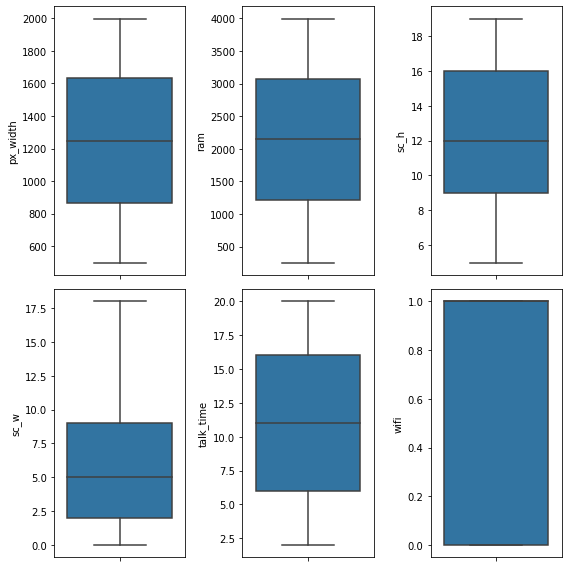

In [ ]:
#outlier handling
fig, axes = plt.subplots(2, 3, figsize=(8,8))
sns.boxplot(  y='px_width', data=mobile_data_new,  orient='v' , ax=axes[0, 0])
sns.boxplot(  y='ram',  data=mobile_data_new,  orient='v' , ax=axes[0, 1])
sns.boxplot(  y='sc_h', data=mobile_data_new,  orient='v' , ax=axes[0, 2])
sns.boxplot(  y='sc_w', data=mobile_data_new,  orient='v' , ax=axes[1, 0])
sns.boxplot(  y='talk_time',  data=mobile_data_new,  orient='v' , ax=axes[1, 1])
sns.boxplot(  y='wifi',  data=mobile_data_new,  orient='v' , ax=axes[1, 2])
plt.tight_layout()
plt.show()

No outlier in these columns

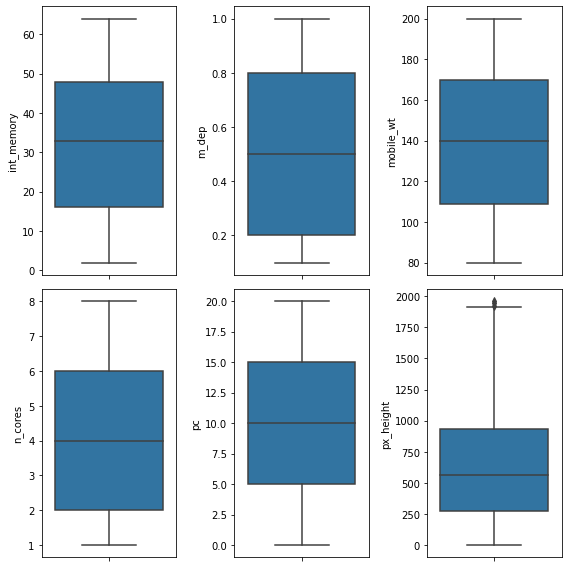

In [ ]:
#outlier handling
fig, axes = plt.subplots(2, 3, figsize=(8,8))
sns.boxplot(  y='int_memory', data=mobile_data_new,  orient='v' , ax=axes[0, 0])
sns.boxplot(  y='m_dep',  data=mobile_data_new,  orient='v' , ax=axes[0, 1])
sns.boxplot(  y='mobile_wt', data=mobile_data_new,  orient='v' , ax=axes[0, 2])
sns.boxplot(  y='n_cores', data=mobile_data_new,  orient='v' , ax=axes[1, 0])
sns.boxplot(  y='pc',  data=mobile_data_new,  orient='v' , ax=axes[1, 1])
sns.boxplot(  y='px_height',  data=mobile_data_new,  orient='v' , ax=axes[1, 2])
plt.tight_layout()
plt.show()

No outliers

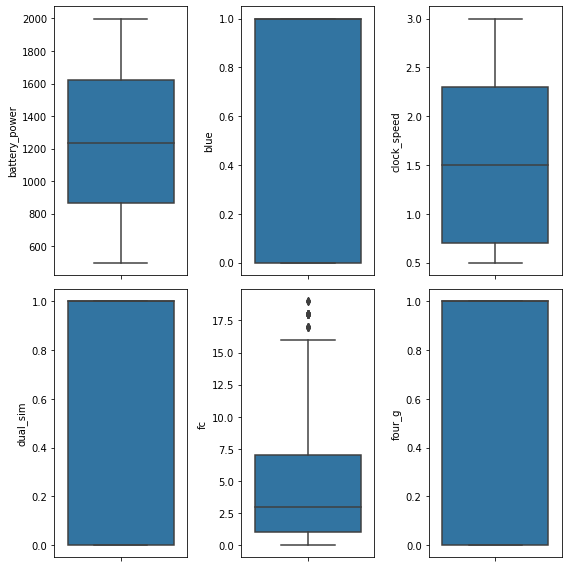

In [ ]:
#outlier handling
fig, axes = plt.subplots(2, 3, figsize=(8,8))
sns.boxplot(  y='battery_power', data=mobile_data_new,  orient='v' , ax=axes[0, 0])
sns.boxplot(  y='blue',  data=mobile_data_new,  orient='v' , ax=axes[0, 1])
sns.boxplot(  y='clock_speed', data=mobile_data_new,  orient='v' , ax=axes[0, 2])
sns.boxplot(  y='dual_sim', data=mobile_data_new,  orient='v' , ax=axes[1, 0])
sns.boxplot(  y='fc',  data=mobile_data_new,  orient='v' , ax=axes[1, 1])
sns.boxplot(  y='four_g',  data=mobile_data_new,  orient='v' , ax=axes[1, 2])
plt.tight_layout()
plt.show()

outlier is there only for the column fc so dropping those columns

In [ ]:
Q1=np.percentile(mobile_data_new["fc"],25,interpolation="midpoint")
print("Q1)",Q1)
Q2=np.percentile(mobile_data_new["fc"],50)
print("Q2",Q2)
Q3=np.percentile(mobile_data_new["fc"],75)
print("Q3",Q3)

IQR=Q3-Q1
print("IQR",IQR)

low_lim=Q1-1.5*IQR
upp_lim=Q3+1.5*IQR

print("low_lim",low_lim)
print("upp_lim",upp_lim)

outlier=[]
for x in mobile_data_new["fc"]:
    if (x>upp_lim) or (x<low_lim):
        outlier.append(x)

print("outlier", outlier)

ind1=mobile_data_new["fc"]>upp_lim

ind_1=mobile_data_new.loc[ind1].index

#print("index of outlier", ind1)

mobile_data_new.drop(ind_1,inplace=True)

Q1) 1.0
Q2 3.0
Q3 7.0
IQR 6.0
low_lim -8.0
upp_lim 16.0
outlier [18, 18, 18, 18, 17, 18, 17, 19, 19, 18, 18, 18, 18, 18, 18, 17, 18, 17, 17, 18, 17, 17, 18, 18, 18, 17, 18, 18, 19, 18, 18, 18]


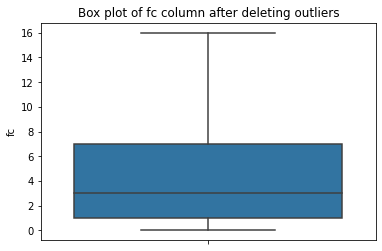

In [ ]:
sns.boxplot(  y='fc', data=mobile_data_new)
plt.title("Box plot of fc column after deleting outliers")
plt.show()

now no ouliers left in the dataset

In [ ]:
mobile_data_test, mobile_data = mobile_data_new[mobile_data_new["ind"].eq("test")], mobile_data_new[mobile_data_new["ind"].eq("train")]

In [ ]:
print("The train set details:", mobile_data.shape)
mobile_data=mobile_data.drop(['id','ind'],axis=1)
print("\n", mobile_data.columns)

print("The test set details:", mobile_data_test.shape)
mobile_data_test=mobile_data_test.drop(['id','ind'],axis=1)
print("\n", mobile_data_test.columns)

The train set details: (1968, 23)

 Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')
The test set details: (978, 23)

 Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')


**Splitting the dataset into independent and dependent variables**

In [ ]:
#independent variable "x_data"
x_data=mobile_data.drop(["price_range"],axis=1)
#dependent variable "y_data"
y_data=mobile_data["price_range"]
print(x_data.shape)
print(y_data.shape)
x_data_1=x_data.copy()
x_data_1.head(2)

(1968, 20)
(1968,)


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0


In [ ]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x_data,y_data,random_state=0,test_size=0.25)

print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)
x_test.iloc[1]

(1476, 20)
(1476,)
(492, 20)
(492,)


battery_power    1422.0
blue                0.0
clock_speed         1.0
dual_sim            0.0
fc                 15.0
four_g              0.0
int_memory          3.0
m_dep               0.1
mobile_wt         112.0
n_cores             1.0
pc                 17.0
px_height           1.0
px_width          926.0
ram               509.0
sc_h               19.0
sc_w                1.0
talk_time           3.0
three_g             1.0
touch_screen        1.0
wifi                1.0
Name: 801, dtype: float64

In [ ]:
pip install catboost

In [ ]:
from catboost import CatBoostClassifier

cat = CatBoostClassifier()


cat.fit(x_train,y_train, plot=True, early_stopping_rounds=30, verbose=100)

y_pred_test=cat.predict(mobile_data_test)
y_pred_test
mobile_data_test.iloc[2]

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.080714
0:	learn: 1.2775752	total: 10.8ms	remaining: 10.7s
100:	learn: 0.1940775	total: 564ms	remaining: 5.02s
200:	learn: 0.1064568	total: 1.29s	remaining: 5.13s
300:	learn: 0.0718045	total: 1.85s	remaining: 4.3s
400:	learn: 0.0530860	total: 2.42s	remaining: 3.62s
500:	learn: 0.0403977	total: 2.97s	remaining: 2.96s
600:	learn: 0.0324959	total: 3.75s	remaining: 2.49s
700:	learn: 0.0267168	total: 4.33s	remaining: 1.85s
800:	learn: 0.0226407	total: 4.87s	remaining: 1.21s
900:	learn: 0.0194575	total: 5.46s	remaining: 601ms
999:	learn: 0.0168681	total: 5.99s	remaining: 0us


battery_power    1807.0
blue                1.0
clock_speed         2.8
dual_sim            0.0
fc                  1.0
four_g              0.0
int_memory         27.0
m_dep               0.9
mobile_wt         186.0
n_cores             3.0
pc                  4.0
px_height        1270.0
px_width         1366.0
ram              2396.0
sc_h               17.0
sc_w               10.0
talk_time          10.0
three_g             0.0
touch_screen        1.0
wifi                1.0
price_range         NaN
Name: 2, dtype: float64

**Scaling**

In [ ]:
#standard scaling
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
x_data=scalar.fit_transform(x_data)
x_data=pd.DataFrame(x_data,columns=x_data_1.columns)
x_data.head(3)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,-0.899849,-0.988883,0.831225,-1.018463,-0.766500,-1.042572,-1.381860,0.338097,1.351141,-1.105124,-1.300264,-1.408561,-1.142001,0.395175,-0.787338,0.281823,1.458439,-1.780307,-1.004073,0.990895
1,-0.491937,1.011242,-1.251258,0.981872,-1.006245,0.959166,1.156995,0.684466,-0.118085,-0.668313,-0.636644,0.601257,1.711335,0.470751,1.112409,-0.636054,-0.740954,0.561701,0.995943,-1.009189
2,-1.535643,1.011242,-1.251258,0.981872,-0.526756,0.959166,0.494685,1.377205,0.136204,0.205310,-0.636644,1.414268,1.081377,0.444944,-0.312401,-0.865524,-0.374388,0.561701,0.995943,-1.009189


**MODEL BUILDING**

Train test split

In [ ]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x_data,y_data,random_state=0,test_size=0.25)

print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)

(1476, 20)
(1476,)
(492, 20)
(492,)


In [ ]:
pip install catboost

In [ ]:
from catboost import CatBoostClassifier

cat = CatBoostClassifier()


cat.fit(x_train,y_train, plot=True, early_stopping_rounds=30, verbose=100)

y_pred_test=cat.predict(mobile_data_test)
y_pred_test

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.080714
0:	learn: 1.2775752	total: 6.67ms	remaining: 6.66s
100:	learn: 0.1940775	total: 600ms	remaining: 5.34s
200:	learn: 0.1064568	total: 1.28s	remaining: 5.08s
300:	learn: 0.0718045	total: 1.8s	remaining: 4.19s
400:	learn: 0.0530860	total: 2.37s	remaining: 3.54s
500:	learn: 0.0403977	total: 3.06s	remaining: 3.04s
600:	learn: 0.0324959	total: 4.6s	remaining: 3.05s
700:	learn: 0.0267168	total: 6.07s	remaining: 2.59s
800:	learn: 0.0226407	total: 7.74s	remaining: 1.92s
900:	learn: 0.0194575	total: 9.44s	remaining: 1.04s
999:	learn: 0.0168681	total: 10.9s	remaining: 0us


array([[3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],

In [ ]:
x_test.iloc[1]

battery_power    0.421875
blue            -0.988883
clock_speed     -0.638763
dual_sim        -1.018463
fc               2.589924
four_g          -1.042572
int_memory      -1.602630
m_dep           -1.393749
mobile_wt       -0.796190
n_cores         -1.541936
pc               1.188312
px_height       -1.451710
px_width        -0.748278
ram             -1.484999
sc_h             1.587346
sc_w            -1.094993
talk_time       -1.474085
three_g          0.561701
touch_screen     0.995943
wifi             0.990895
Name: 781, dtype: float64

In [ ]:
mobile_data_test["price_range"]=y_pred_test
mobile_data_test.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,1043,1,1.8,1,14,0,5,0.1,193,3,...,226,1412,3476,12,7,2,0,1,0,3.0
1,841,1,0.5,1,4,1,61,0.8,191,5,...,746,857,3895,6,0,7,1,0,0,3.0
2,1807,1,2.8,0,1,0,27,0.9,186,3,...,1270,1366,2396,17,10,10,0,1,1,3.0
4,1434,0,1.4,0,11,1,49,0.5,108,6,...,749,810,1773,15,8,7,1,0,1,3.0
5,1464,1,2.9,1,5,1,50,0.8,198,8,...,569,939,3506,10,7,3,1,1,1,3.0


**Merging  test and train dataframes.**

In [ ]:
new_mobile_data=pd.concat([mobile_data,mobile_data_test],axis=0)
new_mobile_data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1.0
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2.0
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2.0
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1.0
5,1859,0,0.5,1,3,0,22,0.7,164,1,...,1004,1654,1067,17,1,10,1,0,0,1.0


In [ ]:
print("The size of test dataframe",mobile_data_test.shape)
print("The size of train dataframe",mobile_data.shape)
print("The size of new dataframe",new_mobile_data.shape)

The size of test dataframe (978, 21)
The size of train dataframe (1968, 21)
The size of new dataframe (2946, 21)


In [ ]:
new_mobile_data.head(2)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1.0
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2.0


In [ ]:
l=len(new_mobile_data)
l

2946

In [ ]:
# craeting an empty dataset to create the random data
df=pd.DataFrame()

In [ ]:
#creating the 1st column called "rser_id"
data = np.random.randint(23000, 850000, size=l)
df = pd.DataFrame(data, columns=['user_id'])


In [ ]:
#creating type of request column
request=["Hardware","Software"]
df["type of Request"]=np.random.choice(request,p=[0.7, 0.3], size=l)
df["type of Request"].value_counts()

Hardware    2047
Software     899
Name: type of Request, dtype: int64

In [ ]:
#creating type of hardware and type of software column
hardware=['Display', 'Battery', 'Memory', 'Camera', 'Touch Screen', 'Processor', 'SIM']
software=["OS","Network Type", "GPS", "UI"]
df.loc[df["type of Request"]=="Software", 'type of hardware'] = 0
df.loc[df["type of Request"]=="Hardware", 'type of software'] = 0

In [ ]:
df["type of hardware"].value_counts()

0.0    899
Name: type of hardware, dtype: int64

In [ ]:
for i in range(0,l):
  if df["type of hardware"][i]==0:
    df['type of software'][i]=np.random.choice(software,p=[0.3, 0.3,0.2,0.2])
  else:
    df['type of hardware'][i]==0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [ ]:
df["type of software"].value_counts()

0.0             2047
OS               274
Network Type     273
UI               199
GPS              153
Name: type of software, dtype: int64

In [ ]:
for i in range(0,l):
  if df["type of software"][i]==0:
    df['type of hardware'][i]=np.random.choice(hardware,p=[0.15,0.15,0.2,0.3,0.1,0.05,0.05])
  else:
    df['type of software'][i]==0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [ ]:
df["type of hardware"].value_counts()

0.0             899
Camera          608
Memory          405
Display         321
Battery         294
Touch Screen    199
SIM             116
Processor       104
Name: type of hardware, dtype: int64

In [ ]:
#creating the type of description column
display=['Display Size',"Display Type"]
battery=[" Good Battery capacity "]
memory=["RAM","ROM","Expandable"]
camera=["Front camera pixel","Back camera pixel size","Type of camera"]
touchscreen=["Required","Dial Pad"]
processor=["No:of cores","processor speed"]
sim=["single sim","dual sim"]

os=["Android","ios"]
network_type=["4G","3G","GSM"]
GPS=["availablity of gps_required"]
UI=["Touch sensitivity"]

df.loc[df["type of hardware"]==0.0, 'Description'] = 0

for i in range(0,l):
    
      if df["type of hardware"][i]=="Display":
        df["Description"][i]=np.random.choice(display,p=[0.4,0.6])
      elif df["type of hardware"][i]=="Battery":
        df["Description"][i]=np.random.choice(battery)
      elif df["type of hardware"][i]=="Memory": 
        df["Description"][i]=np.random.choice(memory,p=[0.45,0.2,0.35]) 
      elif df["type of hardware"][i]=="Camera":
        df["Description"][i]=np.random.choice(camera,p=[0.3,0.45,0.25])  
      elif df["type of hardware"][i]=="Touch Screen":
        df["Description"][i]=np.random.choice(touchscreen)   
      elif df["type of hardware"][i]=="Processor":
        df["Description"][i]=np.random.choice(processor,p=[0.4,0.6]) 
      elif df["type of hardware"][i]=="SIM":
        df["Description"][i]=np.random.choice(sim,p=[0.4,0.6])  
      elif  df["type of software"][i]=="OS":
        df["Description"][i]=np.random.choice(os,p=[0.65,0.35])  
      elif df["type of software"][i]=="Network Type":
        df["Description"][i]=np.random.choice(network_type,p=[0.6,0.3,0.1])  
      elif df["type of software"][i]=="GPS":
        df["Description"][i]=np.random.choice(GPS)  
      elif df["type of software"][i]=="UI":
          df["Description"][i]=np.random.choice(UI) 


  #mobile_data_new.loc[mobile_data_new["type of hardware"].isnull(),'type of hardware'] = np.random.choice(hardware,size=len(mobile_data_new))
print(df['Description'].value_counts())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


 Good Battery capacity         294
Back camera pixel size         277
Display Type                   201
Touch sensitivity              199
Front camera pixel             191
RAM                            188
Android                        188
4G                             158
availablity of gps_required    153
Type of camera                 140
Expandable                     135
Display Size                   120
Required                       100
Dial Pad                        99
3G                              88
ios                             86
ROM                             82
processor speed                 66
dual sim                        64
single sim                      52
No:of cores                     38
GSM                             27
Name: Description, dtype: int64


In [ ]:
#final created dataset
df.head()

,user_id,type of Request,type of hardware,type of software,Description
0,520842,Software,0.0,OS,ios
1,491401,Software,0.0,UI,Touch sensitivity
2,405400,Hardware,Memory,0.0,ROM
3,460956,Hardware,Battery,0.0,Good Battery capacity
4,575169,Hardware,Display,0.0,Display Type


In [ ]:
#dataframe to CSV file
df.to_csv("hardware_software.csv",header=True,index=False)

In [ ]:
#reading the data to python environment
new_data=pd.read_csv("/content/hardware_software.csv")

In [ ]:
new_data_copy=new_data.copy()

In [ ]:
new_data_2=new_data

In [ ]:
new_data_copy.head(2)

,user_id,type of Request,type of hardware,type of software,Description
0,520842,Software,0.0,OS,ios
1,491401,Software,0.0,UI,Touch sensitivity


In [ ]:
new_data.head(2)

,user_id,type of Request,type of hardware,type of software,Description
0,520842,Software,0.0,OS,ios
1,491401,Software,0.0,UI,Touch sensitivity


In [ ]:
#df.to_csv("F:\\ictak_internship\\MobileDataSets\\hardware_software.csv",header=True,index=False)

In [ ]:
#new_data.head(1)

In [ ]:
#new_data.shape

In [ ]:
new_data.insert(0, 'New_ID', range(1, 1 + len(new_data)))
new_data.head()

,New_ID,user_id,type of Request,type of hardware,type of software,Description
0,1,520842,Software,0.0,OS,ios
1,2,491401,Software,0.0,UI,Touch sensitivity
2,3,405400,Hardware,Memory,0.0,ROM
3,4,460956,Hardware,Battery,0.0,Good Battery capacity
4,5,575169,Hardware,Display,0.0,Display Type


In [ ]:
new_mobile_data.insert(0, 'New_ID', range(1, 1 + len(new_mobile_data)))
new_mobile_data.head()

,New_ID,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,1,842,0,2.2,0,1,0,7,0.6,188,...,20,756,2549,9,7,19,0,0,1,1.0
1,2,1021,1,0.5,1,0,1,53,0.7,136,...,905,1988,2631,17,3,7,1,1,0,2.0
2,3,563,1,0.5,1,2,1,41,0.9,145,...,1263,1716,2603,11,2,9,1,1,0,2.0
4,4,1821,1,1.2,0,13,1,44,0.6,141,...,1208,1212,1411,8,2,15,1,1,0,1.0
5,5,1859,0,0.5,1,3,0,22,0.7,164,...,1004,1654,1067,17,1,10,1,0,0,1.0


In [ ]:
df=pd.merge(new_mobile_data, new_data, on = ['New_ID'], how = 'left')
df.head()

,New_ID,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,talk_time,three_g,touch_screen,wifi,price_range,user_id,type of Request,type of hardware,type of software,Description
0,1,842,0,2.2,0,1,0,7,0.6,188,...,19,0,0,1,1.0,520842,Software,0.0,OS,ios
1,2,1021,1,0.5,1,0,1,53,0.7,136,...,7,1,1,0,2.0,491401,Software,0.0,UI,Touch sensitivity
2,3,563,1,0.5,1,2,1,41,0.9,145,...,9,1,1,0,2.0,405400,Hardware,Memory,0.0,ROM
3,4,1821,1,1.2,0,13,1,44,0.6,141,...,15,1,1,0,1.0,460956,Hardware,Battery,0.0,Good Battery capacity
4,5,1859,0,0.5,1,3,0,22,0.7,164,...,10,1,0,0,1.0,575169,Hardware,Display,0.0,Display Type


In [ ]:
from sklearn.preprocessing import LabelEncoder
# creating instance of labelencoder
labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column
df['type of Request'] = labelencoder.fit_transform(df['type of Request'])
df.head()

,New_ID,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,talk_time,three_g,touch_screen,wifi,price_range,user_id,type of Request,type of hardware,type of software,Description
0,1,842,0,2.2,0,1,0,7,0.6,188,...,19,0,0,1,1.0,520842,1,0.0,OS,ios
1,2,1021,1,0.5,1,0,1,53,0.7,136,...,7,1,1,0,2.0,491401,1,0.0,UI,Touch sensitivity
2,3,563,1,0.5,1,2,1,41,0.9,145,...,9,1,1,0,2.0,405400,0,Memory,0.0,ROM
3,4,1821,1,1.2,0,13,1,44,0.6,141,...,15,1,1,0,1.0,460956,0,Battery,0.0,Good Battery capacity
4,5,1859,0,0.5,1,3,0,22,0.7,164,...,10,1,0,0,1.0,575169,0,Display,0.0,Display Type


In [ ]:
categorical_columns = ["type of hardware",	"type of software",	"Description"]
for column in categorical_columns:
    tempdf = pd.get_dummies(df[column], prefix=column)
    df = pd.merge(
        left=df,
        right=tempdf,
        left_index=True,
        right_index=True,
    )
    df = df.drop(columns=column)
df.head()

,New_ID,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,Description_RAM,Description_ROM,Description_Required,Description_Touch sensitivity,Description_Type of camera,Description_availablity of gps_required,Description_dual sim,Description_ios,Description_processor speed,Description_single sim
0,1,842,0,2.2,0,1,0,7,0.6,188,...,0,0,0,0,0,0,0,1,0,0
1,2,1021,1,0.5,1,0,1,53,0.7,136,...,0,0,0,1,0,0,0,0,0,0
2,3,563,1,0.5,1,2,1,41,0.9,145,...,0,1,0,0,0,0,0,0,0,0
3,4,1821,1,1.2,0,13,1,44,0.6,141,...,0,0,0,0,0,0,0,0,0,0
4,5,1859,0,0.5,1,3,0,22,0.7,164,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
x_data= df.drop(["New_ID","user_id","type of Request"],axis=1)
x_data.head(1)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,Description_RAM,Description_ROM,Description_Required,Description_Touch sensitivity,Description_Type of camera,Description_availablity of gps_required,Description_dual sim,Description_ios,Description_processor speed,Description_single sim
0,842,0,2.2,0,1,0,7,0.6,188,2,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
x_data.shape

(2946, 56)

In [ ]:
y_data=df[["type of Request"]]
y_data.shape

(2946, 1)

Label Encoding of *type of Request*

In [ ]:
x_data_1=x_data.copy()
x_data_1.shape

(2946, 56)

In [ ]:
#standard scaling
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()

x_data=scalar.fit_transform(x_data)

x_data=pd.DataFrame(x_data,columns=x_data_1.columns)
x_data.head(3)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,Description_RAM,Description_ROM,Description_Required,Description_Touch sensitivity,Description_Type of camera,Description_availablity of gps_required,Description_dual sim,Description_ios,Description_processor speed,Description_single sim
0,-0.911061,-1.004082,0.820140,-1.023355,-0.781394,-1.017119,-1.412401,0.324424,1.364072,-1.074526,...,-0.261085,-0.169208,-0.187449,-0.269152,-0.223368,-0.234051,-0.149019,5.766785,-0.151383,-0.134046
1,-0.501168,0.995935,-1.253061,0.977178,-1.020537,0.983169,1.127784,0.673494,-0.112482,-0.638259,...,-0.261085,-0.169208,-0.187449,3.715376,-0.223368,-0.234051,-0.149019,-0.173407,-0.151383,-0.134046
2,-1.549944,0.995935,-1.253061,0.977178,-0.542251,0.983169,0.465127,1.371634,0.143075,0.234275,...,-0.261085,5.909892,-0.187449,-0.269152,-0.223368,-0.234051,-0.149019,-0.173407,-0.151383,-0.134046


In [ ]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x_data,y_data,random_state=0,test_size=0.25)

print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)

(2209, 56)
(2209, 1)
(737, 56)
(737, 1)


In [ ]:
pip install catboost

In [ ]:
from catboost import CatBoostClassifier

cat = CatBoostClassifier()


cat.fit(x_train,y_train)



Learning rate set to 0.014451
0:	learn: 0.6525905	total: 3.14ms	remaining: 3.14s
1:	learn: 0.6181149	total: 5.54ms	remaining: 2.77s
2:	learn: 0.5835727	total: 7.91ms	remaining: 2.63s
3:	learn: 0.5498665	total: 10.2ms	remaining: 2.55s
4:	learn: 0.5222475	total: 12.6ms	remaining: 2.51s
5:	learn: 0.4919983	total: 15ms	remaining: 2.48s
6:	learn: 0.4627161	total: 17.6ms	remaining: 2.49s
7:	learn: 0.4412448	total: 20.1ms	remaining: 2.49s
8:	learn: 0.4122416	total: 22.6ms	remaining: 2.48s
9:	learn: 0.3904581	total: 25.1ms	remaining: 2.48s
10:	learn: 0.3684384	total: 27.6ms	remaining: 2.48s
11:	learn: 0.3493404	total: 31.1ms	remaining: 2.56s
12:	learn: 0.3272671	total: 33.7ms	remaining: 2.56s
13:	learn: 0.3081854	total: 36.2ms	remaining: 2.55s
14:	learn: 0.2922820	total: 39ms	remaining: 2.56s
15:	learn: 0.2715978	total: 40.6ms	remaining: 2.5s
16:	learn: 0.2562214	total: 43.2ms	remaining: 2.5s
17:	learn: 0.2413333	total: 45.7ms	remaining: 2.49s
18:	learn: 0.2277553	total: 48.2ms	remaining: 2.49

In [ ]:
y_pred_cat=cat.predict(x_test)

from sklearn.metrics import confusion_matrix, accuracy_score, f1_score,precision_score,recall_score,classification_report


#training score
train_cat=round(cat.score(x_train,y_train),3)
print("Training score of catboost classifier is : ", round(cat.score(x_train,y_train),3))
acc_cat=accuracy_score(y_test,y_pred_cat)
print("Test Accuracy of Cat Boost is : ",round(acc_cat,3)*100,"%" )

con_cat=confusion_matrix(y_test,y_pred_cat)
print("\n The confusion matrix of Cat Boost is \n\n",con_cat)

#classification report
print("\nThe classification report of category booster is:")
print(classification_report(y_test, y_pred_cat))

Training score of catboost classifier is :  1.0
Test Accuracy of Cat Boost is :  100.0 %

 The confusion matrix of Cat Boost is 

 [[526   0]
 [  0 211]]

The classification report of category booster is:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       526
           1       1.00      1.00      1.00       211

    accuracy                           1.00       737
   macro avg       1.00      1.00      1.00       737
weighted avg       1.00      1.00      1.00       737



In [ ]:
from sklearn.linear_model import LogisticRegression
#creating an instance of logistic regression
lr = LogisticRegression()
#fitting the model
lr.fit(x_train,y_train)
#predicting the model
y_pred_lr=lr.predict(x_test)

#evaluation metrics
#training score
train_lr=round(lr.score(x_train,y_train),3)
print("the training score of logistic regression is : ", round(lr.score(x_train,y_train),3))
#testing score
acc_lr=accuracy_score(y_test,y_pred_lr)
print("Test Accuracy of Logistic Regression is : ",round(acc_lr,4)*100,"%" )
#confusion matrix
con_lr=confusion_matrix(y_test,y_pred_lr)
print("\n The confusion matrix of logistic regression is \n\n",con_lr)
#classification report
print("\n The classification report of logistic regression is : \n")
print(classification_report(y_test, y_pred_lr))

the training score of logistic regression is :  1.0
Test Accuracy of Logistic Regression is :  100.0 %

 The confusion matrix of logistic regression is 

 [[526   0]
 [  0 211]]

 The classification report of logistic regression is : 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       526
           1       1.00      1.00      1.00       211

    accuracy                           1.00       737
   macro avg       1.00      1.00      1.00       737
weighted avg       1.00      1.00      1.00       737



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


**Both model gives 100% accuracy**

***Ranking***

In [ ]:
from sklearn.preprocessing import LabelEncoder
# creating instance of labelencoder
le = LabelEncoder()


In [ ]:
from sklearn.preprocessing import LabelEncoder
# creating instance of labelencoder
labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column
new_data_2['type of Request'] = labelencoder.fit_transform(new_data_2['type of Request'])
new_data_2['type of hardware'] = labelencoder.fit_transform(new_data_2['type of hardware'])
new_data_2['type of software'] = labelencoder.fit_transform(new_data_2['type of software'])
new_data_2['Description'] = labelencoder.fit_transform(new_data_2['Description'])
new_data_2.head()

,New_ID,user_id,type of Request,type of hardware,type of software,Description
0,1,520842,1,0,3,19
1,2,491401,1,0,4,15
2,3,405400,0,4,0,13
3,4,460956,0,1,0,0
4,5,575169,0,3,0,7


In [ ]:
new_data_2=new_data_2.drop("user_id",axis=1)

In [ ]:
new_data_copy["rank by type of hardware"]=new_data_2.groupby("type of Request")["type of hardware"].rank(method="dense",ascending=False)
new_data_copy.head()

,user_id,type of Request,type of hardware,type of software,Description,rank by type of hardware
0,520842,Software,0.0,OS,ios,1.0
1,491401,Software,0.0,UI,Touch sensitivity,1.0
2,405400,Hardware,Memory,0.0,ROM,4.0
3,460956,Hardware,Battery,0.0,Good Battery capacity,7.0
4,575169,Hardware,Display,0.0,Display Type,5.0


In [ ]:
ranked_hardware = new_data_copy.drop_duplicates(subset=["type of hardware"])
ranked_hardware

,user_id,type of Request,type of hardware,type of software,Description,rank by type of hardware
0,520842,Software,0.0,OS,ios,1.0
2,405400,Hardware,Memory,0.0,ROM,4.0
3,460956,Hardware,Battery,0.0,Good Battery capacity,7.0
4,575169,Hardware,Display,0.0,Display Type,5.0
5,725895,Hardware,Processor,0.0,processor speed,3.0
11,580622,Hardware,Touch Screen,0.0,Required,1.0
16,38263,Hardware,Camera,0.0,Front camera pixel,6.0
48,810746,Hardware,SIM,0.0,single sim,2.0


**In type of hardware, touchscreen feature has the highest ranking. And the lowest one goes to battery**

In [ ]:
new_data_copy["rank by type of software"]=new_data_2.groupby("type of Request")["type of software"].rank(method="dense",ascending=False)
new_data_copy.head()

,user_id,type of Request,type of hardware,type of software,Description,rank by type of hardware,rank by type of software
0,520842,Software,0.0,OS,ios,1.0,2.0
1,491401,Software,0.0,UI,Touch sensitivity,1.0,1.0
2,405400,Hardware,Memory,0.0,ROM,4.0,1.0
3,460956,Hardware,Battery,0.0,Good Battery capacity,7.0,1.0
4,575169,Hardware,Display,0.0,Display Type,5.0,1.0


In [ ]:
ranked_software = new_data_copy.drop_duplicates(subset=["type of software"])
ranked_software

,user_id,type of Request,type of hardware,type of software,Description,rank by type of hardware,rank by type of software
0,520842,Software,0.0,OS,ios,1.0,2.0
1,491401,Software,0.0,UI,Touch sensitivity,1.0,1.0
2,405400,Hardware,Memory,0.0,ROM,4.0,1.0
8,823964,Software,0.0,Network Type,GSM,1.0,3.0
14,498946,Software,0.0,GPS,availablity of gps_required,1.0,4.0


**Here the highest rank goes to UI and lowest one goes to GPS.**

**Classification based on price_range**



In [ ]:
x_data_new= df.drop(["New_ID","user_id","price_range"],axis=1)
x_data_new.head(1)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,Description_RAM,Description_ROM,Description_Required,Description_Touch sensitivity,Description_Type of camera,Description_availablity of gps_required,Description_dual sim,Description_ios,Description_processor speed,Description_single sim
0,842,0,2.2,0,1,0,7,0.6,188,2,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
x_data.shape

(2946, 56)

In [ ]:
y_data_new=df[["price_range"]]
y_data.shape

(2946, 1)

Label Encoding of *type of Request*

In [ ]:
x_data_new_1=x_data_new.copy()
x_data_new_1.shape

(2946, 56)

In [ ]:
#standard scaling
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()

x_data_new=scalar.fit_transform(x_data_new)

x_data_new=pd.DataFrame(x_data_new,columns=x_data_new_1.columns)
x_data_new.head(3)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,Description_RAM,Description_ROM,Description_Required,Description_Touch sensitivity,Description_Type of camera,Description_availablity of gps_required,Description_dual sim,Description_ios,Description_processor speed,Description_single sim
0,-0.911061,-1.004082,0.820140,-1.023355,-0.781394,-1.017119,-1.412401,0.324424,1.364072,-1.074526,...,-0.261085,-0.169208,-0.187449,-0.269152,-0.223368,-0.234051,-0.149019,5.766785,-0.151383,-0.134046
1,-0.501168,0.995935,-1.253061,0.977178,-1.020537,0.983169,1.127784,0.673494,-0.112482,-0.638259,...,-0.261085,-0.169208,-0.187449,3.715376,-0.223368,-0.234051,-0.149019,-0.173407,-0.151383,-0.134046
2,-1.549944,0.995935,-1.253061,0.977178,-0.542251,0.983169,0.465127,1.371634,0.143075,0.234275,...,-0.261085,5.909892,-0.187449,-0.269152,-0.223368,-0.234051,-0.149019,-0.173407,-0.151383,-0.134046


In [ ]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x_data_new,y_data_new,random_state=0,test_size=0.25)

print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)

(2209, 56)
(2209, 1)
(737, 56)
(737, 1)


In [ ]:
pip install catboost

In [ ]:
from catboost import CatBoostClassifier

cat = CatBoostClassifier()


cat.fit(x_train,y_train)



Learning rate set to 0.082391
0:	learn: 1.3142241	total: 8.84ms	remaining: 8.83s
1:	learn: 1.2534500	total: 16.4ms	remaining: 8.17s
2:	learn: 1.1963068	total: 24.2ms	remaining: 8.05s
3:	learn: 1.1570887	total: 31.9ms	remaining: 7.94s
4:	learn: 1.1183702	total: 39.6ms	remaining: 7.88s
5:	learn: 1.0863132	total: 47.1ms	remaining: 7.8s
6:	learn: 1.0517098	total: 54.6ms	remaining: 7.75s
7:	learn: 1.0250298	total: 62ms	remaining: 7.69s
8:	learn: 1.0018195	total: 69.4ms	remaining: 7.64s
9:	learn: 0.9776785	total: 76.8ms	remaining: 7.61s
10:	learn: 0.9591143	total: 84.2ms	remaining: 7.57s
11:	learn: 0.9443850	total: 95.2ms	remaining: 7.84s
12:	learn: 0.9241062	total: 103ms	remaining: 7.8s
13:	learn: 0.9071014	total: 110ms	remaining: 7.75s
14:	learn: 0.8903702	total: 118ms	remaining: 7.72s
15:	learn: 0.8763557	total: 125ms	remaining: 7.69s
16:	learn: 0.8662857	total: 133ms	remaining: 7.67s
17:	learn: 0.8525568	total: 140ms	remaining: 7.66s
18:	learn: 0.8384835	total: 148ms	remaining: 7.63s
19:

In [ ]:
y_pred_cat=cat.predict(x_test)

from sklearn.metrics import confusion_matrix, accuracy_score, f1_score,precision_score,recall_score,classification_report


#training score
train_cat=round(cat.score(x_train,y_train),3)
print("Training score of catboost classifier is : ", round(cat.score(x_train,y_train),3))
acc_cat=accuracy_score(y_test,y_pred_cat)
print("Test Accuracy of Cat Boost is : ",round(acc_cat,3)*100,"%" )

con_cat=confusion_matrix(y_test,y_pred_cat)
print("\n The confusion matrix of Cat Boost is \n\n",con_cat)

#classification report
print("\nThe classification report of category booster is:")
print(classification_report(y_test, y_pred_cat))

Training score of catboost classifier is :  1.0
Test Accuracy of Cat Boost is :  67.60000000000001 %

 The confusion matrix of Cat Boost is 

 [[100   1   0  30]
 [  3  91   4  23]
 [  0   6  66  55]
 [ 44  39  34 241]]

The classification report of category booster is:
              precision    recall  f1-score   support

         0.0       0.68      0.76      0.72       131
         1.0       0.66      0.75      0.71       121
         2.0       0.63      0.52      0.57       127
         3.0       0.69      0.67      0.68       358

    accuracy                           0.68       737
   macro avg       0.67      0.68      0.67       737
weighted avg       0.67      0.68      0.67       737



In [ ]:
from sklearn.linear_model import LogisticRegression
#creating an instance of logistic regression
lr = LogisticRegression()
#fitting the model
lr.fit(x_train,y_train)
#predicting the model
y_pred_lr=lr.predict(x_test)

#evaluation metrics
#training score
train_lr=round(lr.score(x_train,y_train),3)
print("the training score of logistic regression is : ", round(lr.score(x_train,y_train),3))
#testing score
acc_lr=accuracy_score(y_test,y_pred_lr)
print("Test Accuracy of Logistic Regression is : ",round(acc_lr,4)*100,"%" )
#confusion matrix
con_lr=confusion_matrix(y_test,y_pred_lr)
print("\n The confusion matrix of logistic regression is \n\n",con_lr)
#classification report
print("\n The classification report of logistic regression is : \n")
print(classification_report(y_test, y_pred_lr))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


the training score of logistic regression is :  0.587
Test Accuracy of Logistic Regression is :  56.169999999999995 %

 The confusion matrix of logistic regression is 

 [[104  19   0   8]
 [  1  15   2 103]
 [  0   0   0 127]
 [ 47  16   0 295]]

 The classification report of logistic regression is : 

              precision    recall  f1-score   support

         0.0       0.68      0.79      0.73       131
         1.0       0.30      0.12      0.18       121
         2.0       0.00      0.00      0.00       127
         3.0       0.55      0.82      0.66       358

    accuracy                           0.56       737
   macro avg       0.38      0.44      0.39       737
weighted avg       0.44      0.56      0.48       737



***The created dataset that classified based on type of request have 100 % accuracy. 
The dataset when classified based on prce_range has an accuracy of 65.9% for cat boost classifier and 56.04% for Logistic Regression.***